<a href="https://colab.research.google.com/github/e-pyrom/DS-Unit-4-Sprint-1-NLP/blob/master/module1-text-data/LS_DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

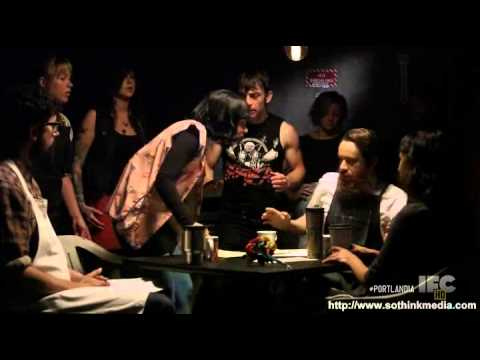

In [0]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [0]:
%pwd

'/Users/pyrome/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [0]:
# Imports
import pandas as pd

# Panda setting
pd.set_option('display.max_rows', 200)
pd. set_option('display.max_columns', 200)

import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokenizer import Tokenizer

from collections import Counter

nlp = spacy.load('en_core_web_lg')

In [0]:
# Coffeshop reviews
url = "data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [0]:
# Strip words from rating column and convert to float
shops['rating'] = shops['star_rating'].str.replace(' star rating', '').astype('float')
del shops['star_rating']
shops['rating'].value_counts(normalize=True).to_frame()

,rating
5.0,0.496324
4.0,0.309874
3.0,0.096901
2.0,0.060399
1.0,0.036502


In [0]:
# Extract date from full_review_text column and convert to datetime

shops['date'] = shops['full_review_text'].str.split(expand=True)[0]
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))
shops['coffee_shop_name'] = shops['coffee_shop_name'].str.lower().str.strip()
shops['full_review_text'] = shops['full_review_text'].str.lower().str.strip()
shops.sample(10)

,coffee_shop_name,full_review_text,rating,date
4370,sa-ten,"delicious smoked salmon toast and ohayo, with ...",5.0,8/31/2016
4574,sorrento’s coffee,"across the hills and over the mountains, past ...",5.0,10/15/2013
6490,quack’s 43rd street bakery,1 check-in delicious pastries in a nice hipste...,4.0,7/13/2016
816,café crème,nice little place outside the city. food was p...,4.0,10/18/2015
6597,juan pelota,1 check-in they make their mochas the old-fash...,4.0,11/18/2014
3637,cenote,we are visiting from out of state. my mission ...,4.0,11/7/2016
5325,genuine joe,"i've been coming to genuine joe's for years, a...",5.0,4/11/2014
1661,summer moon coffee bar,"summermoon...my second home, literally. moved ...",5.0,2/8/2016
1712,fat cats organic coffee and dessert,2 check-ins some of the best baked goods in au...,5.0,10/1/2016
5174,toms,i had chai latte and the flavor really reminds...,5.0,2/17/2016


In [0]:
print(shops.loc[5934, 'full_review_text'])

5 check-ins i have to admit the first time i went in here i was not impressed. there was a cart overflowing with dirty dishes. the garbage was filled to capacity, the cream and sugar area was sticky and gross. and honestly, the place smelled. i was pretty put off. i didn't want to go back...but i did. i *must* have caught them right after a rush. while i'm not impressed with their coffee their lattes are the best i've had in austin. hands down. i've had the coffee twice now. i go by around 4pm and maybe that's a strange hour but one time my coffee was luke warm and the next time it tasted burnt. after a wicked crap day i stopped again and said it would be the last time, that's when i got the latte. + that latte was ordered, paid for and in my hands in less than 2 minutes. super barista! + that latte was goooooooood + the employees are very polite. + i didn't have to repeat my drink order + there were zero snarky comments when i asked where the 'sugar free' list was (you know who i'm ta

In [0]:
# Extract check-ins as int
shops['check-ins'] = shops['full_review_text'].str.extract(r"((\d+) check-ins?)")[1].astype('float').fillna(0)
shops['full_review_text'] = shops['full_review_text'].str.replace(r"(\d+ check-ins?)", "")
shops.sample(10)

,coffee_shop_name,full_review_text,rating,date,check-ins
2475,caffé medici,this is definitely my go-to spot whenever i'm ...,4.0,9/5/2015,0.0
1611,summer moon coffee bar,good cup of ice coffee. we got to see another...,4.0,6/21/2016,1.0
2646,third coast coffee roasting company,"this place is great. friendly staff, excellent...",5.0,9/24/2015,0.0
3639,cenote,"free wifi, good food, friendly crowd, lots of...",5.0,8/10/2015,1.0
2820,dolce neve,we stumbled upon this place since it was near ...,4.0,6/26/2016,0.0
7396,live oak market,this place rocks! having just moved here a cou...,5.0,2/10/2014,0.0
3769,lucky lab coffee,as someone who used to get the same thing ever...,5.0,6/6/2016,0.0
2505,caffé medici,i had a latte here one afternoon on a weekend ...,3.0,2/22/2014,0.0
4406,tea haus,"been here many times, nothing really stood ou...",4.0,5/18/2016,2.0
912,venezia italian gelato,came with my friend 10 days after they opened....,4.0,5/30/2016,0.0


In [0]:
# Remove punctuations
import string
def remove_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation))
print(shops.loc[5934, 'full_review_text'])
shops['full_review_text'] = shops['full_review_text'].apply(remove_punc)

print(shops.loc[5934, 'full_review_text'])

 i have to admit the first time i went in here i was not impressed. there was a cart overflowing with dirty dishes. the garbage was filled to capacity, the cream and sugar area was sticky and gross. and honestly, the place smelled. i was pretty put off. i didn't want to go back...but i did. i *must* have caught them right after a rush. while i'm not impressed with their coffee their lattes are the best i've had in austin. hands down. i've had the coffee twice now. i go by around 4pm and maybe that's a strange hour but one time my coffee was luke warm and the next time it tasted burnt. after a wicked crap day i stopped again and said it would be the last time, that's when i got the latte. + that latte was ordered, paid for and in my hands in less than 2 minutes. super barista! + that latte was goooooooood + the employees are very polite. + i didn't have to repeat my drink order + there were zero snarky comments when i asked where the 'sugar free' list was (you know who i'm talking about

In [0]:
# Lemmatization, process raw text with Spacy
def lemmatize_txt(text):
    lemmas = [] # Store lemmas
    doc = nlp(text) # Instantiate doc object
    # Loop through each token in text
    for token in doc:
        if token.lemma_:
            if not token.lemma_ == '-PRON-':
                lemmas.append(token.lemma_)
    return ' '.join(lemmas)
shops['lemmatize_full_review_text'] = shops['full_review_text'].apply(lemmatize_txt)
shops['lemmatize_full_review_text'] = shops['lemmatize_full_review_text'].str.strip()
shops.head()

,coffee_shop_name,full_review_text,rating,date,check-ins,lemmatize_full_review_text
0,the factory - cafe with a soul,love love loved the atmosphere every corner o...,5.0,11/25/2016,1.0,love love love the atmosphere every corner of ...
1,the factory - cafe with a soul,listed in date night austin ambiance in austin...,4.0,12/2/2016,0.0,list in date night austin ambiance in austin b...
2,the factory - cafe with a soul,listed in brunch spots i loved the eclectic a...,4.0,11/30/2016,1.0,list in brunch spot i love the eclectic and ho...
3,the factory - cafe with a soul,very cool decor good drinks nice seating howev...,2.0,11/25/2016,0.0,very cool decor good drink nice seating howeve...
4,the factory - cafe with a soul,they are located within the northcross mall s...,4.0,12/3/2016,1.0,be locate within the northcross mall shopping ...


In [0]:
shops.loc[0, 'lemmatize_full_review_text']

'love love love the atmosphere every corner of the coffee shop have own style and there be swing i order the matcha latte and be muy fantastico order and get drink be pretty streamlined i order on an ipad which include all beverage selection that range from coffee to wine desire level of sweetness and a checkout system i get latte within minute i be hope for a typical heart or feather on latte but find list out all the possibility of what the art may be any idea'

In [0]:
STOPWORDS = nlp.Defaults.stop_words.union([' ', 'coffee', 'shop'])

def tokenize_text(text):
    tokens = []
    doc = nlp(text) # Instantiate doc object
    """Add tokens w/o Stop Words"""
    for token in doc:
        if token.text not in STOPWORDS:
            tokens.append(token.text)
    return tokens

shops['tokens'] = shops['lemmatize_full_review_text'].apply(tokenize_text)
shops.head()

,coffee_shop_name,full_review_text,rating,date,check-ins,lemmatize_full_review_text,tokens
0,the factory - cafe with a soul,love love loved the atmosphere every corner o...,5.0,11/25/2016,1.0,love love love the atmosphere every corner of ...,"[love, love, love, atmosphere, corner, style, ..."
1,the factory - cafe with a soul,listed in date night austin ambiance in austin...,4.0,12/2/2016,0.0,list in date night austin ambiance in austin b...,"[list, date, night, austin, ambiance, austin, ..."
2,the factory - cafe with a soul,listed in brunch spots i loved the eclectic a...,4.0,11/30/2016,1.0,list in brunch spot i love the eclectic and ho...,"[list, brunch, spot, love, eclectic, homey, pl..."
3,the factory - cafe with a soul,very cool decor good drinks nice seating howev...,2.0,11/25/2016,0.0,very cool decor good drink nice seating howeve...,"[cool, decor, good, drink, nice, seating, over..."
4,the factory - cafe with a soul,they are located within the northcross mall s...,4.0,12/3/2016,1.0,be locate within the northcross mall shopping ...,"[locate, northcross, mall, shopping, center, f..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [0]:
def count(docs):
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [0]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
74,place,3888,6043,1.0,0.018023,0.018023,0.510504
154,good,3587,5382,2.0,0.016051,0.034074,0.470982
58,great,2853,3946,3.0,0.011768,0.045842,0.374606
35,,1874,3873,4.0,0.011551,0.057393,0.246061
157,like,2260,3351,5.0,0.009994,0.067387,0.296744


In [0]:
wc.loc[47, 'word']

'rave'

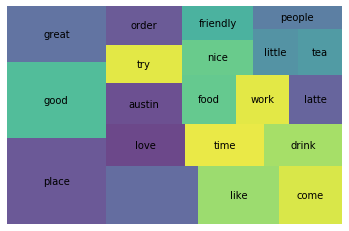

In [0]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [0]:
shops['coffee_shop_name'].nunique()

79

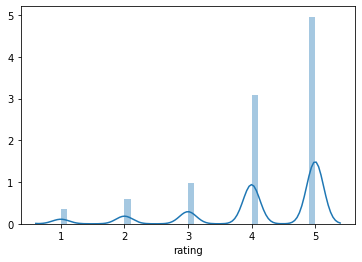

In [0]:
sns.distplot(shops['rating']);

In [0]:
shops.rating.describe()

count    7616.000000
mean        4.169118
std         1.065311
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


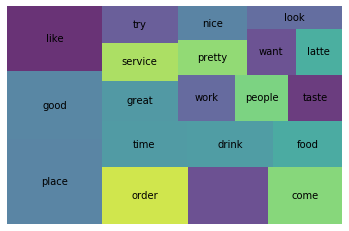

In [0]:
# Bad word count, rating less than 4, rank less than or equal to 20
wc_bad = count(shops[shops['rating'] < 4]['tokens'])
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=0.8)
plt.axis('off')
plt.show()

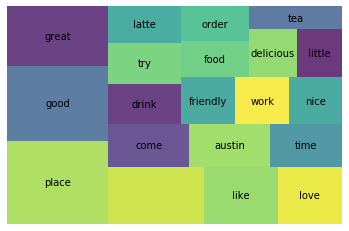

In [0]:
# Good word count
wc_good = count(shops[shops['rating'] >= 4]['tokens'])
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [0]:
wc_bad['appears_in_pct_bad'] = wc_bad['appears_in_pct']
diff = wc_good[['word', 'appears_in_pct']].merge(wc_bad[['word', 'appears_in_pct_bad']], how='outer')
diff.head(20)

,word,appears_in_pct,appears_in_pct_bad
0,place,0.510261,0.511518
1,good,0.478827,0.438347
2,great,0.407980,0.235772
3,,0.246254,0.245257
4,like,0.271661,0.401084
5,love,0.261889,0.142276
6,come,0.241531,0.306233
7,austin,0.251954,0.163279
8,time,0.215961,0.284553
9,drink,0.205375,0.245257


In [0]:
diff['diff'] = diff['appears_in_pct'] - diff['appears_in_pct_bad']
diff.sort_values(by='diff').head(20)

,word,appears_in_pct,appears_in_pct_bad,diff
4,like,0.271661,0.401084,-0.129423
16,order,0.165309,0.293360,-0.128051
130,ask,0.050651,0.149051,-0.098400
29,service,0.140391,0.234417,-0.094026
198,bad,0.037785,0.128049,-0.090264
42,taste,0.106840,0.189024,-0.082184
157,customer,0.044463,0.125339,-0.080876
245,maybe,0.030293,0.103659,-0.073365
87,review,0.077850,0.151084,-0.073234
41,think,0.106515,0.177507,-0.070992


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

